<h1>Analysis Including Only Top 75% Respondents</h1>
<p>
This analysis includes all slider and likert questions. But only
'serious' respondents are included. Those are by questionnaires that
came back with the fewer zeroes than 75% of the respondents.

In [1]:
     from IPython.core.display import HTML
     HTML("""
         <style>
           h1        {text-align : center}
           .subtitle {text-align : center}
           .explanation   {font-size : large}
           .container { width:100% !important; }
         </style>
         """)


In [21]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
import survey_utils

np.set_printoptions(precision=5, suppress=True)  # suppress scientific float notation

In [3]:
dataPath = os.path.join(os.getenv("HOME"), 
                        #'Project/WomenIndustrySurveyHolzblatt/Data/DataForClustering/slidersLikertByItem.csv'
                        'Project/WomenIndustrySurveyHolzblatt/Data/DataForClustering/likertSlidersByRespondentUnfolded.csv'
                       )

data = pd.read_csv(dataPath, sep=',')
# Make the question column the index, so that
# all operations on the dataframe only address
# the numeric scores:
data = data.set_index('question')
# Replace 0s with their column's median.
#data = utils.replaceZerosDataFrame(data, direction='row')


In [4]:
data.head(3)

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,...,s208,s209,s210,s211,s212,s213,s214,s215,s216,s217
question,,,,,,,,,,,,,,,,,,,,,
PersonalExperience|ILackConfidence,35,82,35,53,35,82,47,100,59,41,...,0,0,0,0,0,0,0,0,0,0
WorkLife|ReceivedBadReview,59,94,94,65,94,82,94,100,94,94,...,0,0,0,0,0,0,0,0,0,0
Experience|Bored,12,12,12,12,12,12,12,12,12,12,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Remove the spurious: Men|NoFormerCollab12, Men|NoFormerCollab37, Men|NoFormerCollab62
try:
    data.drop(['Men|NoFormerCollab12', 'Men|NoFormerCollab37', 'Men|NoFormerCollab62', 'Men|NoFormerCollab87'], inplace=True)
except ValueError:
    # Already ran this cell, so the entries are gone:
    pass


Some stats on the responses:

In [6]:
#data[data[data.columns] == 0]
#data['s0'].value_counts().sort_values()
# Number of zeroes in a column:
#type(data[data.columns[0]]) #--> series
#data['s0'].value_counts()[0]
#data[data.columns].values.transpose()
#data[data.columns].value_counts()[0]
participants_as_rows = data[data.columns].transpose()
participants_as_rows.describe()
#participants_as_rows.loc[participants_as_rows == 0]

question,PersonalExperience|ILackConfidence,WorkLife|ReceivedBadReview,Experience|Bored,Feel|ValuedByManager,Power|HaveSelfConfidence,Team|GetsInWay,Team|HoHum,Power|MenGetGoodReactions,Promoted|DontWantClimb,Team|PowerStruggles,...,Team|Alienated,Men|WomenAlsoInterrupt,Manager|PushesGoodThing,Manager|HesitateTakeChallenges,WorkLife|ThinkingOfLeavingJob,Team|LooseGroup,Manager|Micromanages,WorkLife|HateManager,Mentor|AssignedButNotWorking,Feel|WomenValued
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,...,218.000000,218.000000,218.000000,218.0,218.000000,218.000000,218.000000,218.000000,218.0,218.000000
mean,28.481651,35.825688,29.756881,63.146789,21.720183,55.440367,56.137615,23.440367,29.752294,45.380734,...,54.766055,21.876147,32.963303,0.0,23.087156,46.288991,35.949541,31.293578,0.0,57.298165
std,33.482675,41.018225,28.013008,20.047559,26.622461,36.761639,33.759373,29.315519,30.680352,36.013784,...,33.626374,26.477158,31.996378,0.0,32.373066,31.677289,38.527532,37.914360,0.0,19.739737
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,12.000000
25%,0.000000,0.000000,0.000000,62.000000,0.000000,18.000000,29.000000,0.000000,0.000000,0.000000,...,29.000000,0.000000,0.000000,0.0,0.000000,18.000000,0.000000,0.000000,0.0,37.000000
50%,0.000000,0.000000,37.000000,62.000000,0.000000,65.000000,65.000000,0.000000,37.000000,47.000000,...,65.000000,12.000000,37.000000,0.0,0.000000,47.000000,18.000000,0.000000,0.0,62.000000
75%,59.000000,82.000000,37.000000,87.000000,37.000000,88.000000,86.500000,37.000000,62.000000,76.000000,...,82.000000,37.000000,62.000000,0.0,53.000000,71.000000,76.000000,71.000000,0.0,62.000000
max,100.000000,100.000000,87.000000,87.000000,87.000000,100.000000,100.000000,87.000000,87.000000,100.000000,...,100.000000,87.000000,87.000000,0.0,100.000000,100.000000,100.000000,100.000000,0.0,87.000000


Find respondents who answered 'most' questions. Method:
Count the number of zeroes of every respondent. Sort
those numbers in increasing order. Accept the first
75% of the respondents. The outcome is 101 zeroes or
less, and 121 respondents:

In [7]:
num_zeroes = participants_as_rows.apply(pd.Series.value_counts, axis=1)[0]
#num_zeroes.head(5)

In [8]:
print('Median number of zeroes: %s' % num_zeroes.median())
print('Mean number of zeroes: %s' % num_zeroes.mean())
print('75th percentile zeroes: %s' % num_zeroes.quantile(0.75))

Median number of zeroes: 48.5
Mean number of zeroes: 54.880733945
75th percentile zeroes: 98.0


In [9]:
num_zeroes_sorted = num_zeroes.sort_values()
num_records = len(num_zeroes_sorted)
seventy_five_perc_cutoff = np.round(np.round(75*num_records/100)) # 163
#num_zeroes_sorted.iloc[seventy_five_perc_cutoff] # 102
#num_zeroes_sorted.iloc[99:104]
#"num_zeroes_sorted

In [10]:
# Get list of ids for participants who were 
# with 75th percentile of non-zero entries.
# I.e. drop participants with the top 25% number
# of zero answers:
serious_respondent_ids = num_zeroes_sorted.iloc[0:seventy_five_perc_cutoff].index
serious_respondents = data[serious_respondent_ids]
#len(serious_respondents) # 119
#serious_respondents.head(4)

In [11]:
print('Number of serious respondents: %s' % len(serious_respondents))

Number of serious respondents: 118


Find the best algorithm for clustering. Supposedly
the algorithm with the largest Cophenet correlation coefficient
tends to be best:

In [12]:
#serious_respondents.head(4)

In [13]:
# Cophenet correlation coefficient measures 
# how faithfully a dendrogram preserves pairwise
# distance between the original data points, use
# the algo that yields the highest coefficient:

max_c = 0
max_algo = ''
max_cluster_info = None
for algo in ['ward', 'centroid', 'weighted', 'average', 'complete', 'single']:
    cluster_info = linkage(serious_respondents, algo)
    (c, coph_dists) = cophenet(cluster_info, pdist(serious_respondents))
    if c > max_c:
        max_c = c
        max_algo = algo
        max_cluster_info = cluster_info
print("Winning Cocophenet correlation coefficient is the '%s' algorithm: %s" % (max_algo, max_c))
cluster_info = max_cluster_info


Winning Cocophenet correlation coefficient is the 'average' algorithm: 0.864747391781


Create info on successively clustering data
into ever larger clusters. Use e.g. the Ward
option, which measures distance between data items
by the difference in their variance (the more similar
the variance the closer they are)

First line: feature 43 is combined with feature 78 into
a cluster of size 2. Distance in variance between them 
is 2.0. The dataset 
of this table had 0-120 (i.e. 121) questions a.k.a. features. Any 'feature' with a 
number 122 or higher refers to an already formed cluster.
To find items that made up this cluster: 
     theMergeLine = lineGTDataLength - datalength

In [14]:
pd.DataFrame(cluster_info[:5],columns=['feature1', 'feature2', 'distance', 'clusterSize'])

,feature1,feature2,distance,clusterSize
0,111.0,116.0,0.000000,2.0
1,37.0,79.0,17.000000,2.0
2,118.0,119.0,26.500000,4.0
3,8.0,24.0,35.355339,2.0
4,66.0,77.0,43.301270,2.0


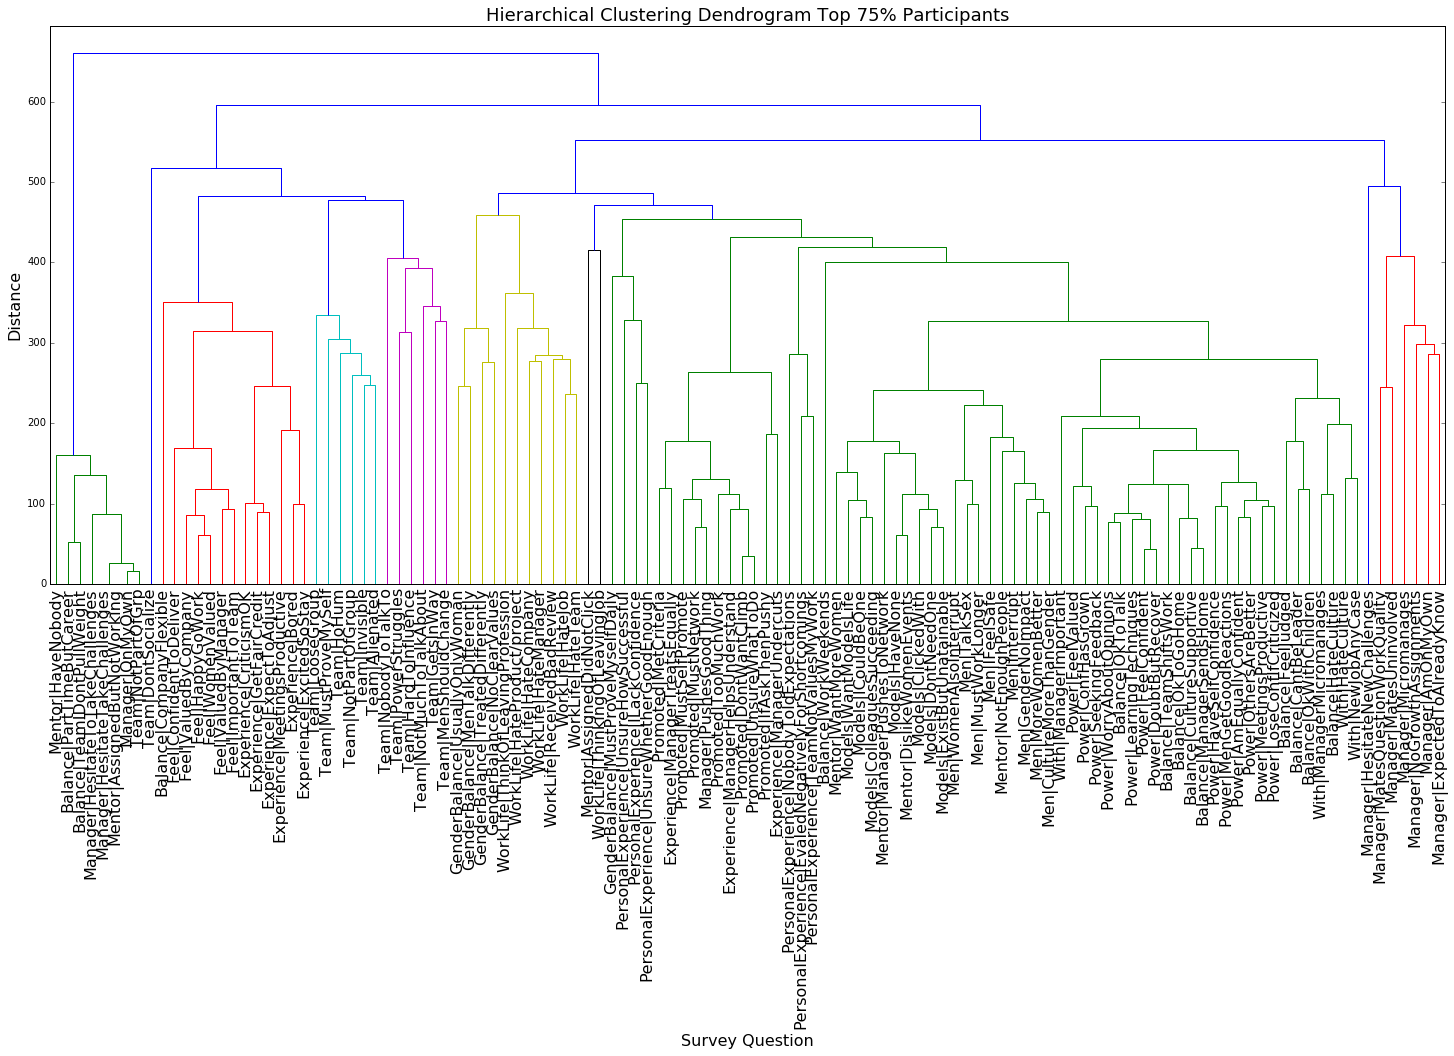

In [15]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram Top 75% Participants', fontsize=18)
plt.xlabel('Survey Question', fontsize=16)
plt.ylabel('Distance', fontsize=16)
dendrogram_data = dendrogram(
        cluster_info,
        leaf_rotation=90.,  # rotates the x axis labels
        leaf_font_size=16.,  # font size for the x axis labels
        labels=data.index,  # question names
)
plt.show()



In [16]:
#dendrogram_data

In [39]:
# Build a DataFrame that combines question, distance, and color.
# Then change the names of the one-letter colors to more readable
# expanded form:
clusters = zip(dendrogram_data['ivl'], dendrogram_data['leaves'], dendrogram_data['color_list'])
clusters = pd.DataFrame(clusters, columns=['Question', 'Distance', 'Color'])
clusters['Color'].replace(['g','r','b','c','m','y','k'], 
                          ['green','red','blue','cyan','magenta','yellow','black'],
                          inplace=True
                         )
clusters.loc[:]
for row in clusters.iterrows():
    print(row)
    #print(row.Name, row.Question, row.Color)
#print_full(clusters)

(0, Question    Mentor|HaveNobody
Distance                   96
Color                   green
Name: 0, dtype: object)
(1, Question    Balance|PartTimeButCareer
Distance                           39
Color                           green
Name: 1, dtype: object)
(2, Question    Balance|TeamIDontPullWeight
Distance                             49
Color                             green
Name: 2, dtype: object)
(3, Question    Manager|HesitateToTakeChallenges
Distance                                  82
Color                                  green
Name: 3, dtype: object)
(4, Question    Manager|HesitateTakeChallenges
Distance                               111
Color                                green
Name: 4, dtype: object)
(5, Question    Mentor|AssignedButNotWorking
Distance                             116
Color                              green
Name: 5, dtype: object)
(6, Question    Manager|OnMyOwn
Distance                 37
Color                 green
Name: 6, dtype: object)
(7, Quest

In [18]:
# set cut-off to 50
max_d = 750 # max_d as in max_distance

In [19]:
plt.figure(figsize=(25, 10))
survey_utils.plotting_utils.fancy_dendrogram(
    cluster_info,
    x_label='Survey Question',
    #***truncate_mode='lastp',
    p=4,
    leaf_rotation=90.,
    leaf_font_size=10.,
    x_axis_font_size=16.,
    y_axis_font_size=16.,
    labels=dataNew.index,
    show_contracted=True,
    annotate_above=10000, # Make high enough never to get distance labels in chart
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()



AttributeError: 'module' object has no attribute 'plotting_utils'